## 소비분석 데이터 분석
- 예측된 문화예술활동 횟수에 따른 feature의 빈도를 토대로 소비분석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# # 경고 메세지 무시하기
# import warnings
# warnings.filterwarnings('ignore')

## 데이터 로드
- NaN 값은 해당 문화예술활동에 참여하지 않은 사람
- 0은 해당 무료 활동에 참여한 사람

In [4]:
CA_raw = pd.read_csv('./data/소비분석.csv')

In [5]:
CA_raw.head()
CA_raw.info()
CA_raw.shape

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,1,3,6,2,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,3,5,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,4,6,2,3,3,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,30000
3,2,4,6,2,4,3,40000.0,0.0,50000.0,NaN,NaN,20000.0,NaN,110000
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53597 entries, 0 to 53596
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                53597 non-null  int64  
 1   education          53597 non-null  int64  
 2   income             53597 non-null  int64  
 3   married            53597 non-null  int64  
 4   work               53597 non-null  int64  
 5   age                53597 non-null  int64  
 6   exhibition_price   4380 non-null   float64
 7   museum_price       5918 non-null   float64
 8   art_price          7349 non-null   float64
 9   traditional_price  18772 non-null  float64
 10  theater_price      9533 non-null   float64
 11  movie_price        22395 non-null  float64
 12  performance_price  4727 non-null   float64
 13  total_price        53597 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 5.7 MB


(53597, 14)

In [6]:
CA = CA_raw.copy()

In [7]:
CS_pred_raw = pd.read_csv('./data/CS_pred.csv')

In [8]:
CS_pred_raw.head()
CS_pred_raw.info()
CS_pred_raw.shape

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,sex,age,education,married,work,income,sido,disabled,pred,target
0,49,0,0,0,5,0,1,1,14,14,...,2,5,3,1,5,3,1,1,3,3
1,3,3,3,0,1,0,2,6,14,9,...,2,5,3,2,5,7,1,1,1,1
2,22,15,0,0,0,0,2,2,14,14,...,2,5,4,3,1,5,1,1,2,2
3,10,0,0,0,2,2,2,4,17,11,...,1,5,4,2,1,6,1,1,2,2
4,7,0,0,0,0,0,3,2,15,12,...,2,5,3,2,1,5,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       2144 non-null   int64
 1   where_cnt      2144 non-null   int64
 2   attend_cnt     2144 non-null   int64
 3   volunteer_cnt  2144 non-null   int64
 4   history_cnt    2144 non-null   int64
 5   festival_cnt   2144 non-null   int64
 6   standard       2144 non-null   int64
 7   block          2144 non-null   int64
 8   expense        2144 non-null   int64
 9   expense_f      2144 non-null   int64
 10  difficulty     2144 non-null   int64
 11  intention      2144 non-null   int64
 12  history        2144 non-null   int64
 13  history_f      2144 non-null   int64
 14  festival       2144 non-null   int64
 15  festival_f     2144 non-null   int64
 16  sex            2144 non-null   int64
 17  age            2144 non-null   int64
 18  education      2144 non-null   int64
 19  marrie

(2144, 26)

## 데이터 전처리 - 소비분석 데이터

### 문화예술 활동에 전혀 참여하지 않은 사람 제외

In [9]:
CA.dropna(subset=['exhibition_price', 'museum_price', 'art_price', 'traditional_price', 'theater_price', 'movie_price', 'performance_price'],
          how='all',
          axis=0,
          inplace=True,
         )

In [10]:
CA.head()
CA.shape

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
2,1,4,6,2,3,3,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,30000
3,2,4,6,2,4,3,40000.0,0.0,50000.0,NaN,NaN,20000.0,NaN,110000
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000


(38287, 14)

### 50~60대인 사람만 선택

In [11]:
CA = CA[(CA['age'] == 5) | (CA['age'] == 6)]

In [12]:
CA.head()
CA.shape

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
10,1,3,5,3,1,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
19,2,3,5,2,1,5,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000


(11997, 14)

## 데이터 전처리 - 문화예술활동 조사 데이터

### 열 선택
- 국민문화예술활동 데이터와 소비분석 데이터가 겹치는 부분만 선택

In [13]:
CS_pred = CS_pred_raw[['sex', 'education', 'income', 'married', 'work', 'target', 'pred']]

In [14]:
CS_pred.head()

,sex,education,income,married,work,target,pred
0,2,3,3,1,5,3,3
1,2,3,7,2,5,1,1
2,2,4,5,3,1,2,2
3,1,4,6,2,1,2,2
4,2,3,5,2,1,1,1


## 데이터 분석 및 시각화

### 문화예술활동 횟수가 많을 것으로 예측되는 사람들에 대한 feature 빈도 분석

In [15]:
# 문화예술활동 횟수가 많은 사람들(target = 3) 선택
CS_pred_3 = CS_pred[CS_pred['target'] == 3]

In [16]:
# 수치로 확인
for column in CS_pred_3.columns[:-2]:
    print('\n', column, '의 비중')
    print(CS_pred_3[column].value_counts())


 sex 의 비중
2    230
1    204
Name: sex, dtype: int64

 education 의 비중
3    235
4    147
2     38
1     14
Name: education, dtype: int64

 income 의 비중
4    90
6    84
5    83
7    76
3    54
2    33
1    14
Name: income, dtype: int64

 married 의 비중
2    342
3     76
1     16
Name: married, dtype: int64

 work 의 비중
1    169
3    120
5    105
2     32
4      8
Name: work, dtype: int64


[Text(0.5, 1.0, 'sex')]

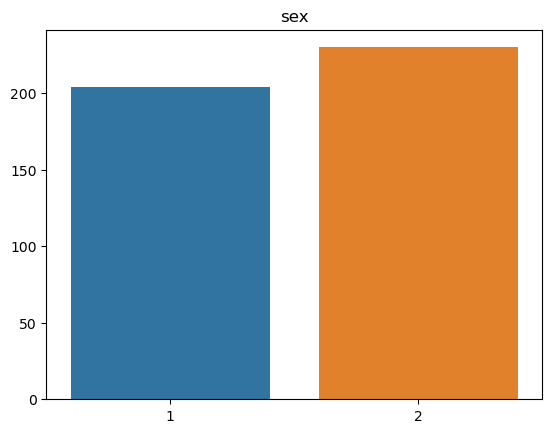

[Text(0.5, 1.0, 'education')]

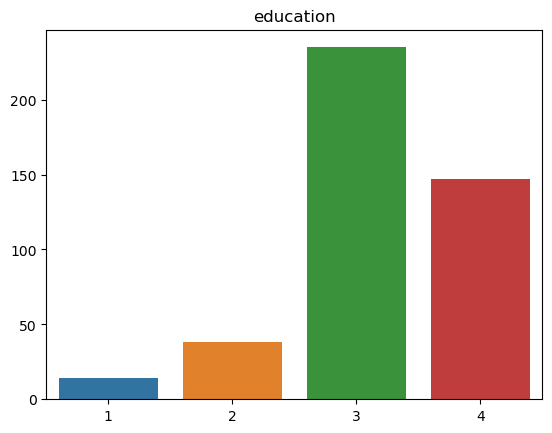

[Text(0.5, 1.0, 'income')]

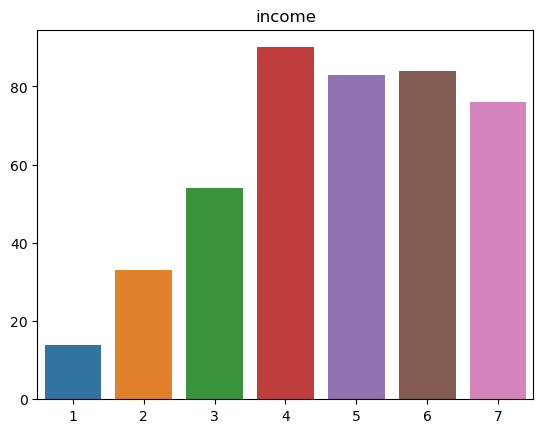

[Text(0.5, 1.0, 'married')]

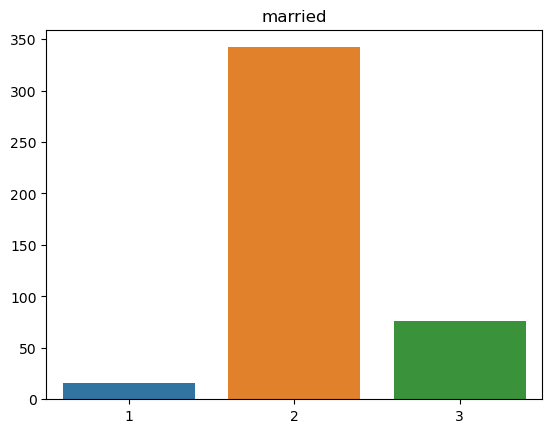

[Text(0.5, 1.0, 'work')]

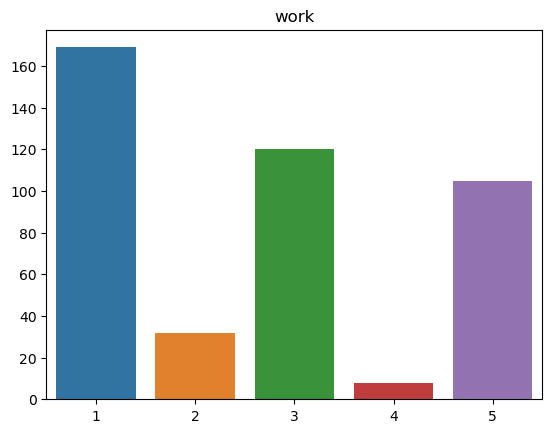

In [17]:
# 시각화
data = CS_pred_3

for i, column in enumerate(data.columns[:-2]):
    vc = data[column].value_counts()
    sns.barplot(x = vc.index,
                y = vc.values,
               ).set(title=column)
    plt.show()

# 성별
# 비슷함

# 최종 학력
# 고졸이 제일 많고 대졸 이상이 그 다음임

# 가구소득
# 300-400만원이 제일 많고
# 400만원 이상과 비슷함

# 혼인상태
# 기혼자가 제일 많음

# 종사상 지위
# 임금 또는 봉급을 받는 근로자가 제일 많음
# 고용원이 없는 자영자 또는 무직(학생)이 그 다음임

In [18]:
# 중요해보이는 열에 대해서만 분석 예정
# 머신러닝 결과의 feature 중요도를 같이 참고한 결과
# education, income, work 가 중요할 것으로 보임

## 소비분석

In [19]:
# 적절한 열 선택
CA = CA[['education', 'income', 'work', 'exhibition_price', 'museum_price', 'art_price', 'traditional_price', 'theater_price', 'movie_price', 'performance_price', 'total_price']]

In [20]:
CA.head()

,education,income,work,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
4,3,6,1,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,3,6,1,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,3,6,1,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
10,3,5,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
19,3,5,1,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000


In [21]:
CA['total_price'].sort_values(ascending=False)[:10]
# 소비 총합 top4는 이상치로 보이므로 제외

43467    69999993
46007    69999993
50453     9999999
50454     9999999
46540     4190000
42584     2700000
42876     2700000
42273     2300000
16084     2300000
39558     2300000
Name: total_price, dtype: int64

In [22]:
# 이상치 제거
remove_values = CA['total_price'].sort_values(ascending=False)[:4].values

remove_cond = (CA['total_price'] != remove_values[0]) & (CA['total_price'] != remove_values[1]) & (CA['total_price'] != remove_values[2]) & (CA['total_price'] != remove_values[3])

CA = CA[remove_cond]

### 가구소득에 따른 소비분석

income
1     42125.112108
2     64246.878547
3     71267.901853
4     71450.316170
5     77973.497268
6     84799.893219
7    166487.257110
Name: total_price, dtype: float64

<Axes: ylabel='total_price'>

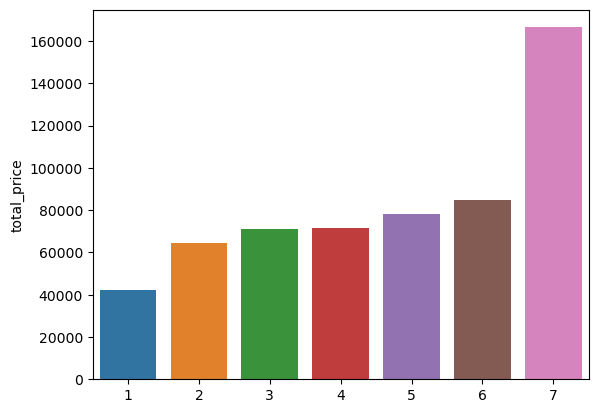

In [23]:
# 가구소득별 총 소비 금액
data = CA

data.groupby('income').mean()['total_price']

# 시각화
x = data['income'].value_counts().sort_index().index
y = data.groupby('income').mean()['total_price']

sns.barplot(x=x, y=y)
plt.show()

### 제일 많이 소비하는 가구소득 층에 대한 소비분석

exhibition_price      34296.703297
museum_price         125752.747253
art_price            100260.681115
traditional_price     65355.362515
theater_price         29273.717949
movie_price           28654.981550
performance_price    122775.510204
dtype: float64

<Axes: >

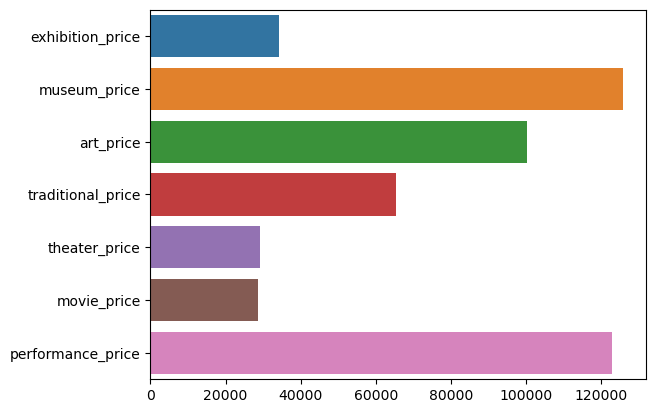

In [24]:
# 제일 많이 소비하는 가구소득 층(500만원 이상)에 대해
# 각 분야별 소비 금액
data = CA
data = data[data['income']==7].iloc[:, 3:10].mean(axis=0)
data

# 시각화
x = data.values
y = data.index

sns.barplot(x=x, y=y)
plt.show()

# 소비를 가장 많이 하는 가구소득 층(500만원 이상)은
# 전통예술공연에 제일 많이 소비하고
# 음악 및 무용 발표회 관람, 박물관 관람에 많이 소비한다.

### 고용형태에 따른 소비분석

work
1     84042.648597
2    100612.584054
3     64687.934783
4     49569.306931
Name: total_price, dtype: float64

<Axes: ylabel='total_price'>

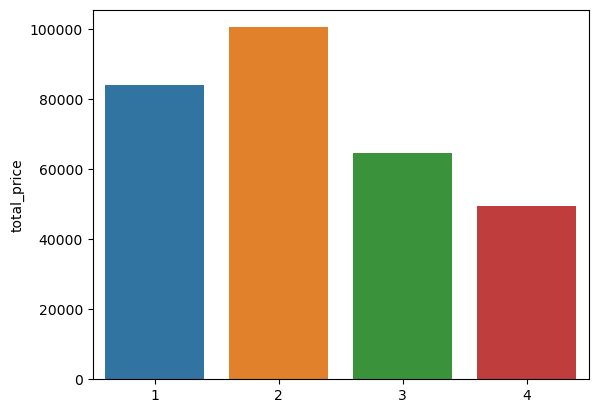

In [25]:
# 종사상 지위별 총 소비 금액
data = CA
column = 'work'

data.groupby(column).mean()['total_price']

# 시각화
x = data[column].value_counts().sort_index().index
y = data.groupby(column).mean()['total_price']

sns.barplot(x=x, y=y)
plt.show()

# 고용원을 둔 사업자가 제일 많음

### 제일 많이 소비하는 고용형태에 대한 소비분석

exhibition_price     30869.565217
museum_price         61030.303030
art_price            56785.714286
traditional_price    37413.341646
theater_price        14500.000000
movie_price           9736.024845
performance_price    76865.384615
dtype: float64

<Axes: >

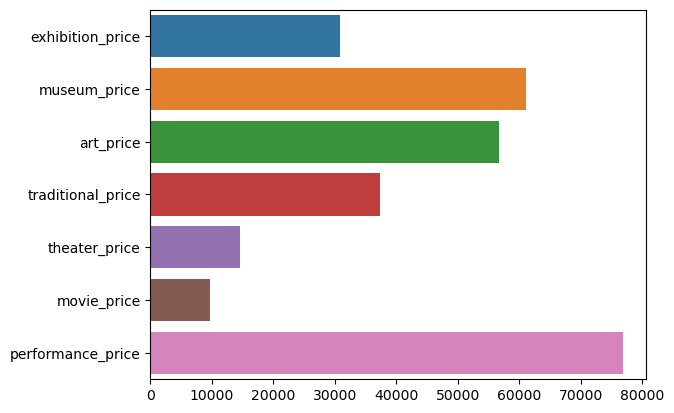

In [26]:
# 제일 많이 소비하는 고용원을 둔 사업자에 대한
# 각 분야별 소비 금액
data = CA
column = 'income'
data = data[data[column]==2].iloc[:, 3:10].mean(axis=0)
data

# 시각화
x = data.values
y = data.index

sns.barplot(x=x, y=y)
plt.show()

# 소비를 가장 많이 하는 고용형태(고용원을 둔 사업자)의 사람들은
# 전통예술공연에 제일 많이 소비하고
# 음악 및 무용 발표회 관람, 대중공연 관람에 많이 소비한다.

# 특히 다른 집단에 비해 전통예술공연에만 많이 소비하는 것으로 보인다.

### 최종학력에 따른 소비분석

education
1     56142.857143
2     42981.727575
3     55016.535114
4    103513.120208
Name: total_price, dtype: float64

<Axes: ylabel='total_price'>

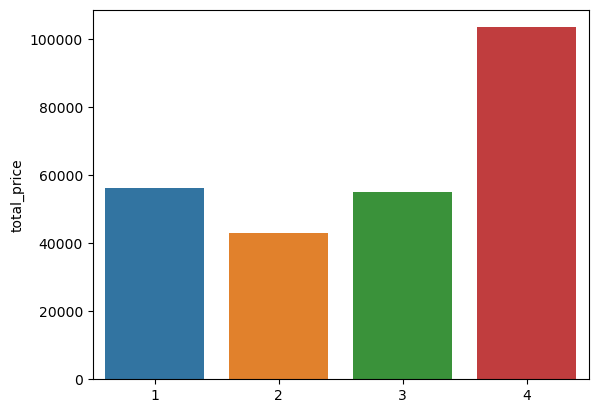

In [27]:
# 학별 총 소비 금액
data = CA
column = 'education'

data.groupby(column).mean()['total_price']

# 시각화
x = data[column].value_counts().sort_index().index
y = data.groupby(column).mean()['total_price']

sns.barplot(x=x, y=y)
plt.show()

# 대졸 이상이 제일 많음

### 제일 많이 소비하는 학력에 대한 소비분석

exhibition_price     41174.434088
museum_price         70045.719844
art_price            90389.673500
traditional_price    51599.999745
theater_price        44898.996865
movie_price          35623.213265
performance_price    99832.020997
dtype: float64

<Axes: >

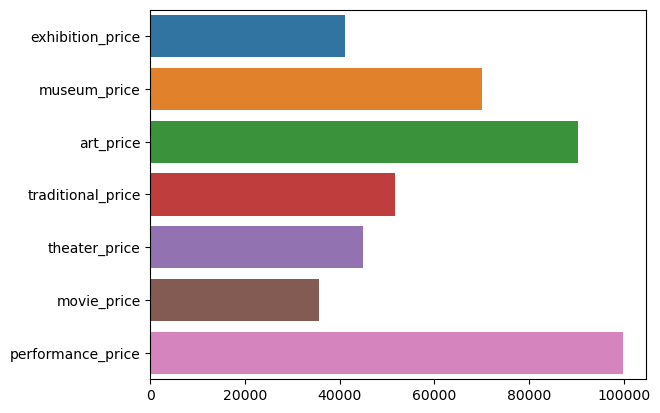

In [28]:
# 제일 많이 소비하는 대졸 이상에 대한
# 각 분야별 소비 금액
data = CA
column = 'education'
data = data[data[column]==4].iloc[:, 3:10].mean(axis=0)

data

# 시각화
x = data.values
y = data.index

sns.barplot(x=x, y=y)
plt.show()

# 소비를 가장 많이 하는 학력(대졸 이상)의 사람들은
# 전통예술공연에 제일 많이 소비하고
# 극장에서 영화 관람, 음악 및 무용 발표회 관람에 많이 소비한다.

# 특히 다른 집단에 비해 비교적 여러 분야에 골고루 소비하는 것으로 보인다.